In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
import numpy as np
from scipy import integrate
from scipy import interpolate
from scipy.integrate import odeint
from nbodykit.lab import *
from nbodykit import setup_logging
from nbodykit.io import bigfile
import matplotlib.pyplot as plt

cosmo = cosmology.Planck15

seedlist_iso = []
for i in range(1991,1991+1):
    seedlist_iso.append(str(i))
    
seedlist_tides = []
for i in range(1991,1991+1):
    seedlist_tides.append(str(i))
    
#kindlist_iso = ['iso', 'm002m002p013', 'm008m008p007']
#kindlist_bL1 = ['ppp0004', 'ppp003', 'ppp007', 'm002m002p013', 'p01p01m01',]

kindlist_bL2 = ['ppp0004', 'ppp003', 'ppp007']

kindlist_bLs2 = ['mmp003', 'mmp005']


force = 'treepm2048'
box = 1000

lambdaz = 0.1
deltabL = 0.004*3

In [7]:
massbin_1000 = np.loadtxt('./bias/1000_massbin.txt')
bias = {}

for kind in kindlist_bL2:
    bias['bL1_'+kind+'_1000'] = np.loadtxt(f'./bias/bL1_{kind}_1000.txt')
    bias['bL1_'+kind+'_1000_SU'] = np.loadtxt(f'./bias/bL1_{kind}_1000_SU.txt')
    bias['bL1_'+kind+'_1000_SU_test'] = np.loadtxt(f'./bias/bL1_{kind}_1000_SU_test.txt')
    bias['bL1_'+kind+'_1000_SUnew'] = np.loadtxt(f'./bias/bL1_{kind}_1000_SUnew.txt')
    bias['bL1_'+kind+'_1000_SUnew_test'] = np.loadtxt(f'./bias/bL1_{kind}_1000_SUnew.txt')
    bias['bL1_'+kind+'_1000_PM'] = np.loadtxt(f'./bias/bL1_{kind}_1000_PM.txt')
    bias['bL1_'+kind+'_1000_RCUT'] = np.loadtxt(f'./bias/bL1_{kind}_1000_RCUT7.txt')
    bias['bL1_'+kind+'_1000_ASMTH3'] = np.loadtxt(f'./bias/bL1_{kind}_1000_ASMTH3.txt')
    bias['bL1_'+kind+'_1000_ASMTH6'] = np.loadtxt(f'./bias/bL1_{kind}_1000_ASMTH6.txt')
    bias['bL1_'+kind+'_1000_ETT'] = np.loadtxt(f'./bias/bL1_{kind}_1000_ETT05.txt')
    bias['bL1_'+kind+'_1000_ETFA'] = np.loadtxt(f'./bias/bL1_{kind}_1000_ETFA0002.txt')
    bias['bL1_'+kind+'_1000_SIMP'] = np.loadtxt(f'./bias/bL1_{kind}_1000_SIMP.txt')
    bias['bL1_'+kind+'_1000_SIMPASMTH45'] = np.loadtxt(f'./bias/bL1_{kind}_1000_SIMPASMTH45.txt')

for kind in kindlist_bL2:
    bias['bL2_'+kind+'_1000'] = np.loadtxt(f'./bias/bL2_{kind}_1000.txt')
    bias['bL2_'+kind+'_1000_SU'] = np.loadtxt(f'./bias/bL2_{kind}_1000_SU.txt')
    bias['bL2_'+kind+'_1000_SU_test'] = np.loadtxt(f'./bias/bL2_{kind}_1000_SU_test.txt')
    bias['bL2_'+kind+'_1000_SUnew'] = np.loadtxt(f'./bias/bL2_{kind}_1000_SUnew.txt')
    bias['bL2_'+kind+'_1000_SUnew_test'] = np.loadtxt(f'./bias/bL2_{kind}_1000_SUnew_test.txt')
    bias['bL2_'+kind+'_1000_PM'] = np.loadtxt(f'./bias/bL2_{kind}_1000_PM.txt')
    bias['bL2_'+kind+'_1000_RCUT'] = np.loadtxt(f'./bias/bL2_{kind}_1000_RCUT7.txt')
    bias['bL2_'+kind+'_1000_ASMTH3'] = np.loadtxt(f'./bias/bL2_{kind}_1000_ASMTH3.txt')
    bias['bL2_'+kind+'_1000_ASMTH6'] = np.loadtxt(f'./bias/bL2_{kind}_1000_ASMTH6.txt')
    bias['bL2_'+kind+'_1000_ETT'] = np.loadtxt(f'./bias/bL2_{kind}_1000_ETT05.txt')
    bias['bL2_'+kind+'_1000_ETFA'] = np.loadtxt(f'./bias/bL2_{kind}_1000_ETFA0002.txt')
    bias['bL2_'+kind+'_1000_SIMP'] = np.loadtxt(f'./bias/bL2_{kind}_1000_SIMP.txt')
    bias['bL2_'+kind+'_1000_SIMPASMTH45'] = np.loadtxt(f'./bias/bL2_{kind}_1000_SIMPASMTH45.txt')

for kind in kindlist_bLs2:
#    bias['bLs2_'+kind+'_1000'] = np.loadtxt(f'./bias/bLs2_{kind}_1000.txt')
    bias['bLs2_'+kind+'_1000_ASMTH6'] = np.loadtxt(f'./bias/bLs2_{kind}_1000_ASMTH6.txt')
#    bias['bLs2_'+kind+'_1000_MST00125'] = np.loadtxt(f'./bias/bLs2_{kind}_1000_MST00125.txt')

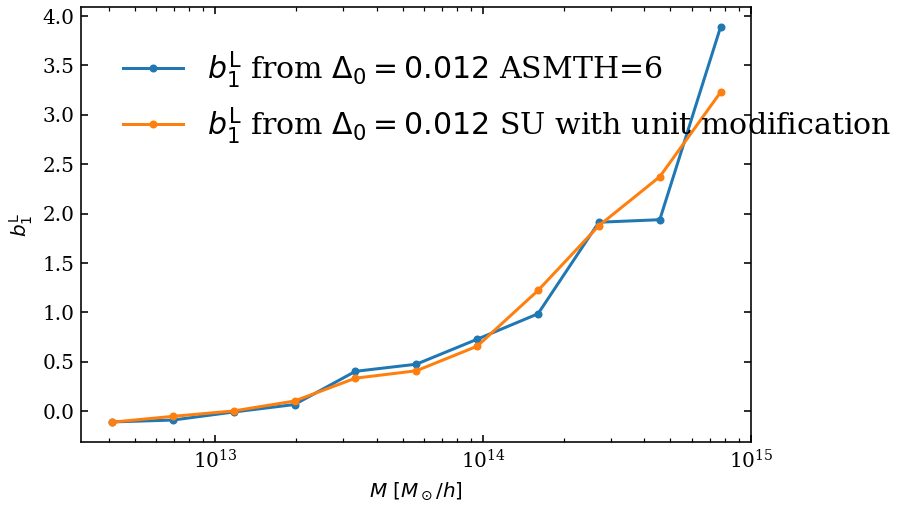

In [25]:
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.012$ TreePM " )
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_SU'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.012$ pure SU" )
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_PM'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.012$ pure PM" )
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_RCUT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.012$ RCUT=7" )
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_ASMTH3'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.012$ ASMTH=3" )
plt.plot(massbin_1000, bias['bL1_ppp0004_1000_ASMTH6'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.012$ ASMTH=6" )
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_SUnew'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.012$ SUnew" )
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_SUnew_test'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.012$ SUnew" )
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_SU'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.012$ SU" )
plt.plot(massbin_1000, bias['bL1_ppp0004_1000_SU_test'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.012$ SU with unit modification" )
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_SIMP'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.012$ Simple splitting" )
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_SIMPASMTH45'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.012$ Simple splitting" )

#plt.plot(massbin, bL1_test1, marker='.',label=r"$b^{\rm L}_{1}$ from (0.1,0.1,-0.1) pairs" )
#plt.plot(massbin_250, bL1_250_ppp, marker='.',label=r"$b^{\rm L}_{1}$ from highres (0.03,0.03,0.03) pairs" )


plt.xlabel(r"$M\ [M_\odot/h]$")
plt.ylabel(r"$b_{1}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
plt.savefig('/home/yinli/csit/analysis/bias/bL1_ppp0004_comp.pdf')

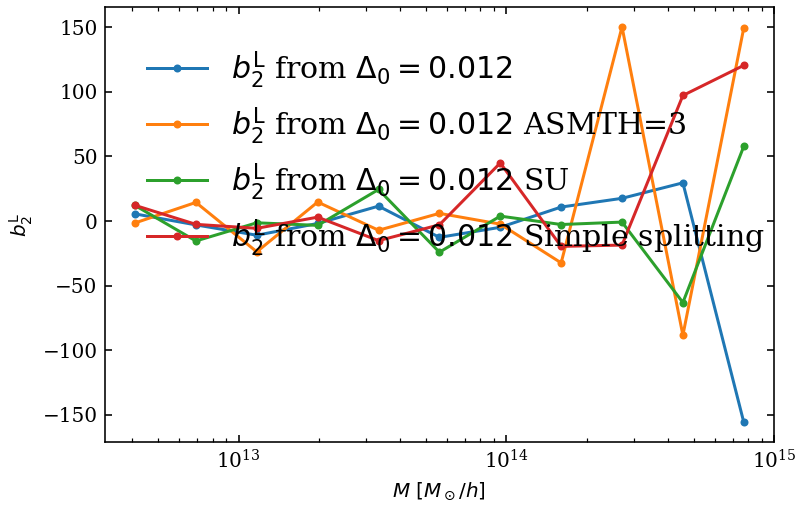

In [14]:
plt.plot(massbin_1000, bias['bL2_ppp0004_1000'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.012$" )
#plt.plot(massbin_1000, bias['bL2_ppp0004_1000_SU'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.012$ pure SU" )
#plt.plot(massbin_1000, bias['bL2_ppp0004_1000_PM'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.012$ and $\Delta\ln{a}=0.0125$" )
plt.plot(massbin_1000, bias['bL2_ppp0004_1000_ASMTH3'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.012$ ASMTH=3" )
plt.plot(massbin_1000, bias['bL2_ppp0004_1000_SUnew'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.012$ SU" )
plt.plot(massbin_1000, bias['bL2_ppp0004_1000_SIMPASMTH45'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.012$ Simple splitting" )

#plt.plot(massbin, bL1_test1, marker='.',label=r"$b^{\rm L}_{1}$ from (0.1,0.1,-0.1) pairs" )
#plt.plot(massbin_250, bL1_250_ppp, marker='.',label=r"$b^{\rm L}_{1}$ from highres (0.03,0.03,0.03) pairs" )


plt.xlabel(r"$M\ [M_\odot/h]$")
plt.ylabel(r"$b_{2}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
#plt.savefig('/home/yinli/csit/analysis/bias/bL2_ppp0004_MST_comp.pdf')

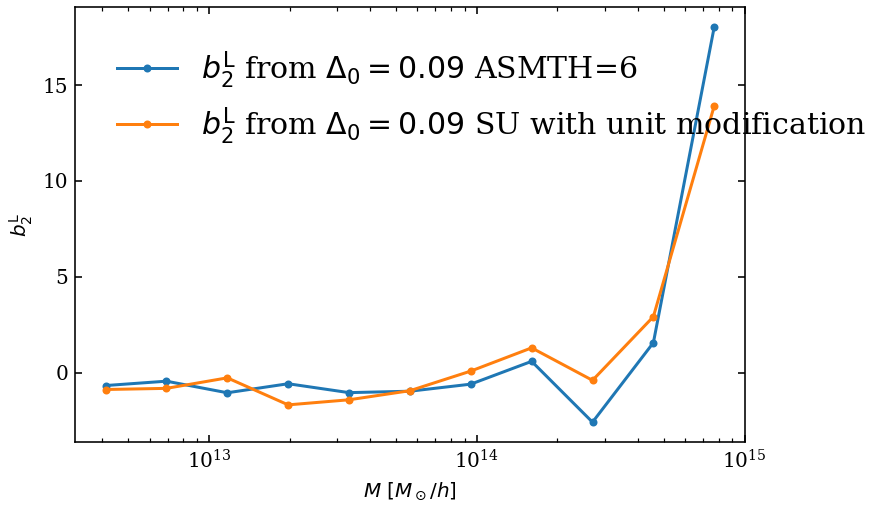

In [27]:
#plt.plot(massbin_1000, bias['bL2_ppp003_1000'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.09$ TreePM" )
#plt.plot(massbin_1000, bias['bL2_ppp003_1000_SU'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.09$ pure SU" )
#plt.plot(massbin_1000, bias['bL2_ppp003_1000_PM'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.09$ pure PM" )
#plt.plot(massbin_1000, bias['bL2_ppp003_1000_RCUT'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.09$ RCUT=7" )
#plt.plot(massbin_1000, bias['bL2_ppp003_1000_ASMTH3'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.09$ ASMTH=3" )
plt.plot(massbin_1000, bias['bL2_ppp003_1000_ASMTH6'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.09$ ASMTH=6" )
#plt.plot(massbin_1000, bias['bL2_ppp003_1000_ETT'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL2_ppp003_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )
#plt.plot(massbin_1000, bias['bL2_ppp003_1000_SUnew'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.09$ SUnew" )
#plt.plot(massbin_1000, bias['bL2_ppp003_1000_SU'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.09$ SU" )
plt.plot(massbin_1000, bias['bL2_ppp003_1000_SU'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.09$ SU with unit modification" )
#plt.plot(massbin_1000, bias['bL2_ppp003_1000_SIMP'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.09$ Simple splitting" )
#plt.plot(massbin_1000, bias['bL2_ppp003_1000_SIMPASMTH45'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.09$ Simple splitting" )

#plt.plot(massbin, bL1_test1, marker='.',label=r"$b^{\rm L}_{1}$ from (0.1,0.1,-0.1) pairs" )
#plt.plot(massbin_250, bL1_250_ppp, marker='.',label=r"$b^{\rm L}_{1}$ from highres (0.03,0.03,0.03) pairs" )


plt.xlabel(r"$M\ [M_\odot/h]$")
plt.ylabel(r"$b_{2}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
plt.savefig('/home/yinli/csit/analysis/bias/bL2_ppp003_comp.pdf')

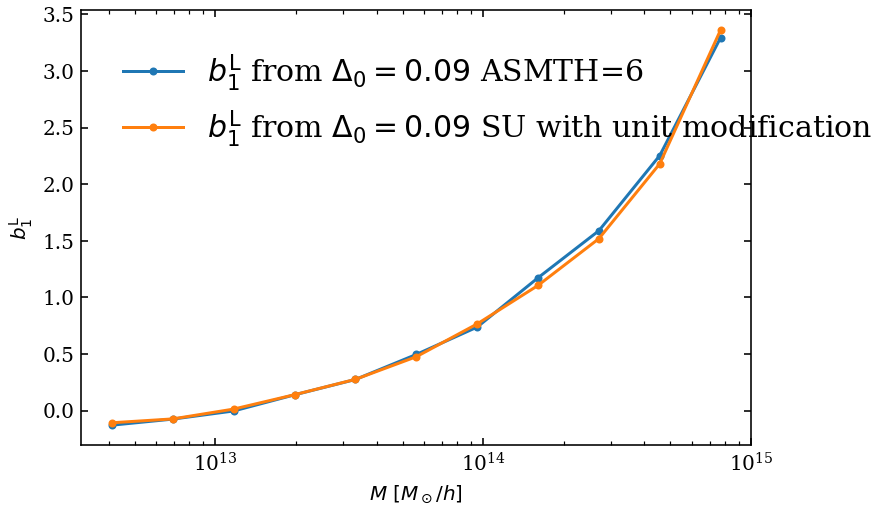

In [28]:
#plt.plot(massbin_1000, bias['bL1_ppp003_1000'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.09$ TreePM" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_SU'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.09$ pure SU" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_PM'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.09$ pure PM" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_RCUT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.09$ RCUT=7" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_ASMTH3'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.09$ ASMTH=3" )
plt.plot(massbin_1000, bias['bL1_ppp003_1000_ASMTH6'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.09$ ASMTH=6" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_ETT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.09$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.09$ ErrrTolForceAcc=0.002" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_SUnew'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.09$ SUnew" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_SU'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.09$ SU" )
plt.plot(massbin_1000, bias['bL1_ppp003_1000_SU_test'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.09$ SU with unit modification" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_SIMP'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.09$ Simple splitting" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_SIMPASMTH45'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.09$ Simple splitting" )

#plt.plot(massbin, bL1_test1, marker='.',label=r"$b^{\rm L}_{1}$ from (0.1,0.1,-0.1) pairs" )
#plt.plot(massbin_250, bL1_250_ppp, marker='.',label=r"$b^{\rm L}_{1}$ from highres (0.03,0.03,0.03) pairs" )

plt.xlabel(r"$M\ [M_\odot/h]$")
plt.ylabel(r"$b_{1}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
plt.savefig('/home/yinli/csit/analysis/bias/bL1_ppp003_comp.pdf')

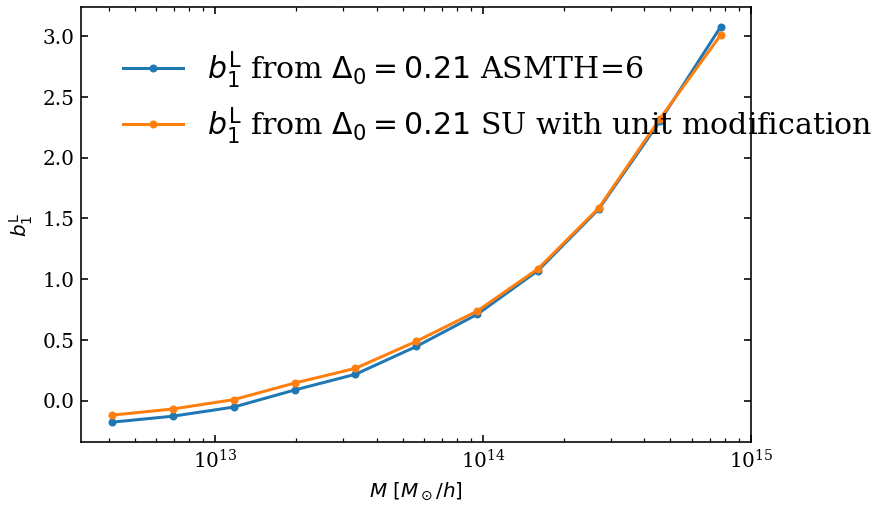

In [34]:
#plt.plot(massbin_1000, bias['bL1_ppp007_1000'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ TreePM" )
#plt.plot(massbin_1000, bias['bL1_ppp007_1000_PM'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ pure PM" )
#plt.plot(massbin_1000, bias['bL1_ppp007_1000_RCUT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ RCUT=7" )
#plt.plot(massbin_1000, bias['bL1_ppp007_1000_ASMTH3'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ASMTH=3" )
plt.plot(massbin_1000, bias['bL1_ppp007_1000_ASMTH6'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ASMTH=6" )
#plt.plot(massbin_1000, bias['bL1_ppp007_1000_ETT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL1_ppp007_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )
#plt.plot(massbin_1000, bias['bL1_ppp007_1000_SUnew'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ SU with unit modification" )
#plt.plot(massbin_1000, bias['bL1_ppp007_1000_SUnew_test'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ SU with unit modification" )
plt.plot(massbin_1000, bias['bL1_ppp007_1000_SU_test'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ SU with unit modification" )

#plt.plot(massbin_1000, bias['bL1_ppp007_1000_SIMP'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ Simple splitting" )
#plt.plot(massbin_1000, bias['bL1_ppp007_1000_SIMPASMTH45'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ Simple splitting" )

#plt.plot(massbin_250, bL1_250_ppp, marker='.',label=r"$b^{\rm L}_{1}$ from highres (0.03,0.03,0.03) pairs" )


plt.xlabel(r"$M\ [M_\odot/h]$")
plt.ylabel(r"$b_{1}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
#plt.savefig('/home/yinli/csit/analysis/bias/bL1_ppp007_comp.pdf')

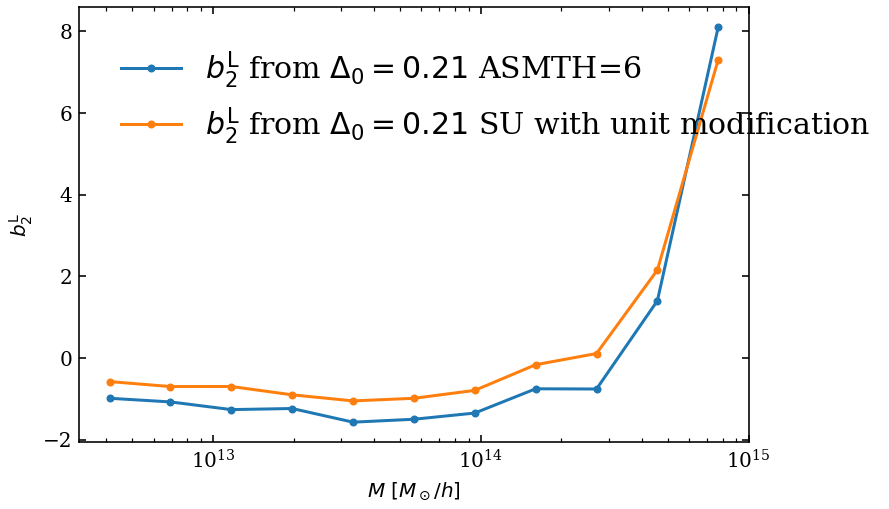

In [35]:
#plt.plot(massbin_1000, bias['bL2_ppp007_1000'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.21$" )
#plt.plot(massbin_1000, bias['bL2_ppp007_1000_PM'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.21$ pure PM" )
#plt.plot(massbin_1000, bias['bL2_ppp007_1000_RCUT'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.21$ RCUT=7" )
#plt.plot(massbin_1000, bias['bL2_ppp007_1000_ASMTH3'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.21$ ASMTH=3" )
plt.plot(massbin_1000, bias['bL2_ppp007_1000_ASMTH6'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.21$ ASMTH=6" )
#plt.plot(massbin_1000, bias['bL2_ppp007_1000_ETT'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL2_ppp007_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )
#plt.plot(massbin_1000, bias['bL2_ppp007_1000_SUnew'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.21$ SUnew" )
plt.plot(massbin_1000, bias['bL2_ppp007_1000_SU_test'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.21$ SU with unit modification" )
#plt.plot(massbin_1000, bias['bL2_ppp007_1000_SIMP'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.21$ Simple splitting" )
#plt.plot(massbin_1000, bias['bL2_ppp007_1000_SIMPASMTH45'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.21$ Simple splitting" )


#plt.plot(massbin, bL1_test1, marker='.',label=r"$b^{\rm L}_{1}$ from (0.1,0.1,-0.1) pairs" )
#plt.plot(massbin_250, bL1_250_ppp, marker='.',label=r"$b^{\rm L}_{1}$ from highres (0.03,0.03,0.03) pairs" )


plt.xlabel(r"$M\ [M_\odot/h]$")
plt.ylabel(r"$b_{2}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
plt.savefig('/home/yinli/csit/analysis/bias/bL2_ppp007_comp.pdf')

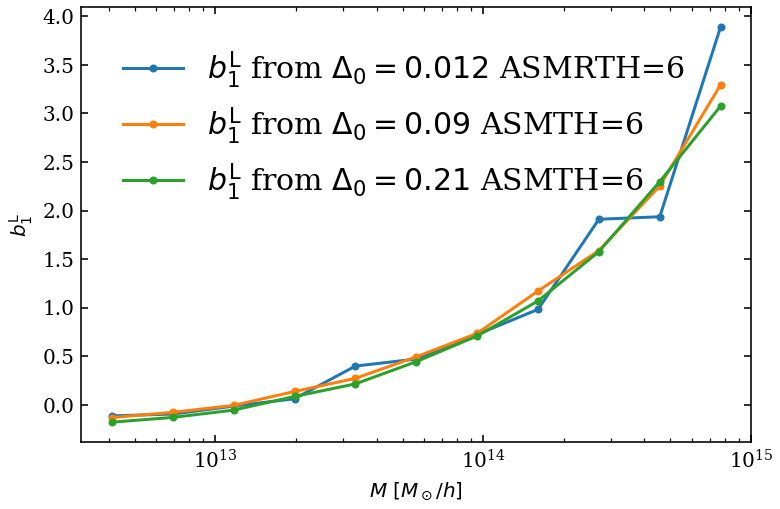

In [22]:
plt.plot(massbin_1000, bias['bL1_ppp0004_1000_ASMTH6'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.012$ ASMRTH=6" )
plt.plot(massbin_1000, bias['bL1_ppp003_1000_ASMTH6'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.09$ ASMTH=6" )
plt.plot(massbin_1000, bias['bL1_ppp007_1000_ASMTH6'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ASMTH=6" )
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_ETT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_ETT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL1_ppp007_1000_ETT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )
#plt.plot(massbin_1000, bias['bL1_ppp007_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )


plt.xlabel(r"$M\ [M_\odot/h]$")
plt.ylabel(r"$b_{1}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
plt.savefig('/home/yinli/csit/analysis/bias/bL1_ASMTH6_comp.pdf')

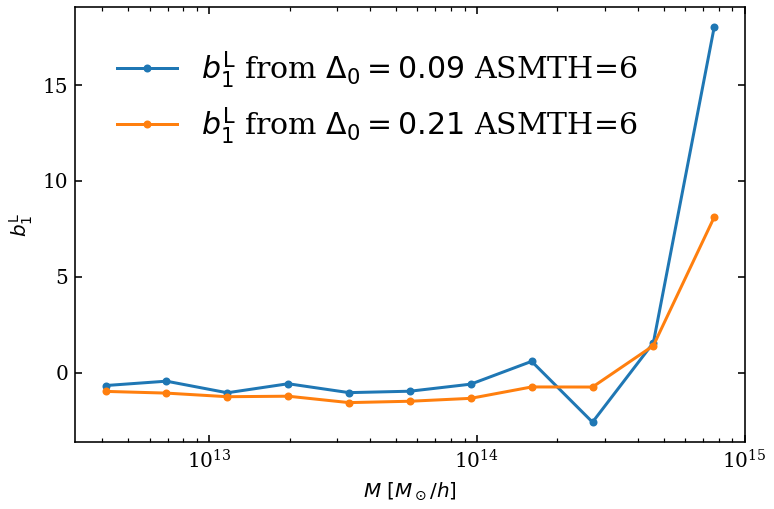

In [23]:
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_ASMTH6'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.012$ ASMRTH=6" )
plt.plot(massbin_1000, bias['bL2_ppp003_1000_ASMTH6'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.09$ ASMTH=6" )
plt.plot(massbin_1000, bias['bL2_ppp007_1000_ASMTH6'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ASMTH=6" )
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_ETT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_ETT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL1_ppp007_1000_ETT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )
#plt.plot(massbin_1000, bias['bL1_ppp007_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )


plt.xlabel(r"$M\ [M_\odot/h]$")
plt.ylabel(r"$b_{1}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
plt.savefig('/home/yinli/csit/analysis/bias/bL2_ASMTH6_comp.pdf')

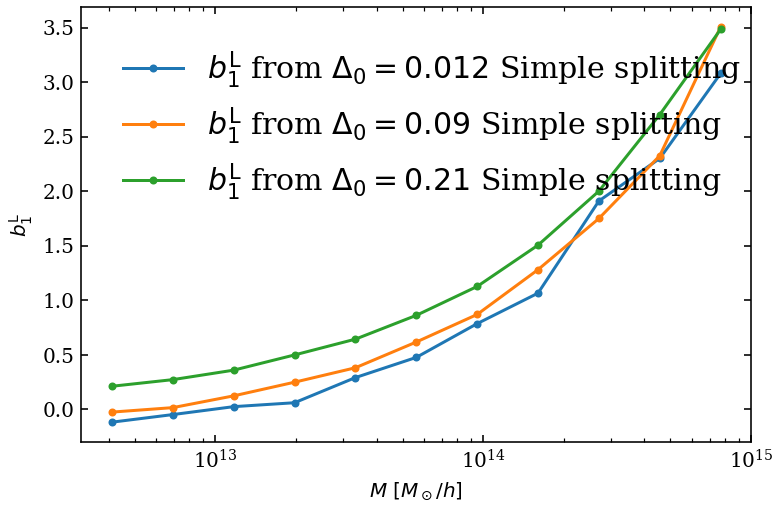

In [24]:
plt.plot(massbin_1000, bias['bL1_ppp0004_1000_SIMPASMTH45'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.012$ Simple splitting" )
plt.plot(massbin_1000, bias['bL1_ppp003_1000_SIMPASMTH45'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.09$ Simple splitting" )
plt.plot(massbin_1000, bias['bL1_ppp007_1000_SIMPASMTH45'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ Simple splitting" )
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_ETT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_ETT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL1_ppp007_1000_ETT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )
#plt.plot(massbin_1000, bias['bL1_ppp007_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )


plt.xlabel(r"$M\ [M_\odot/h]$")
plt.ylabel(r"$b_{1}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
plt.savefig('/home/yinli/csit/analysis/bias/bL1_SIMPASMTH45_comp.pdf')

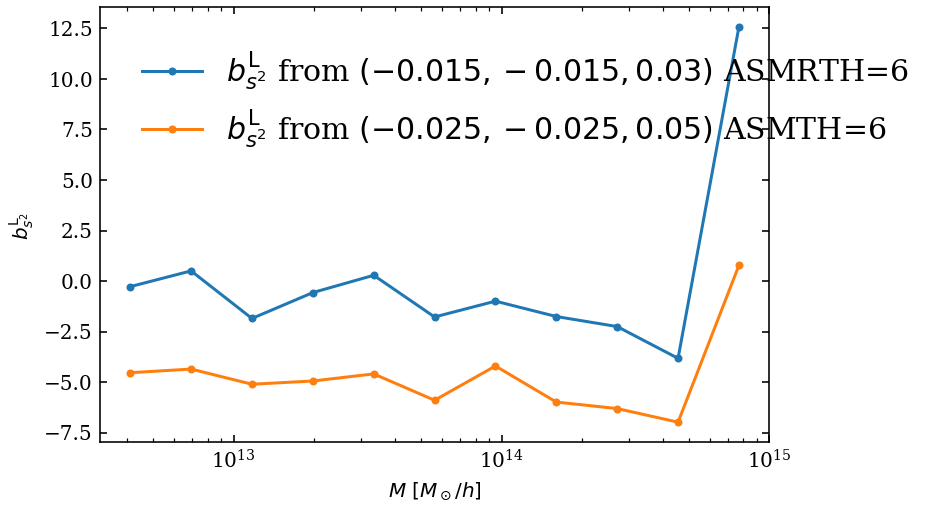

In [19]:
#plt.plot(massbin_1000, bias['bLs2_mmp001_1000_ASMTH6'], marker='.',label=r"$b^{\rm L}_{s^2}$ from $(-0.005,-0.005,0.01)$ ASMRTH=6" )
plt.plot(massbin_1000, bias['bLs2_mmp003_1000_ASMTH6'], marker='.',label=r"$b^{\rm L}_{s^2}$ from $(-0.015,-0.015,0.03)$ ASMRTH=6" )
plt.plot(massbin_1000, bias['bLs2_mmp005_1000_ASMTH6'], marker='.',label=r"$b^{\rm L}_{s^2}$ from $(-0.025,-0.025,0.05)$ ASMTH=6" )
#plt.plot(massbin_1000, bias['bLs2_mmp01_1000_ASMTH6'], marker='.',label=r"$b^{\rm L}_{s^2}$ from $(-0.05,-0.05,0.1)$ ASMTH=6" )
#plt.plot(massbin_1000, bias['bLs2_mmp02_1000_ASMTH6'], marker='.',label=r"$b^{\rm L}_{s^2}$ from $(-0.1,-0.1,0.2)$ ASMTH=6" )

#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_ETT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_ETT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL1_ppp007_1000_ETT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )
#plt.plot(massbin_1000, bias['bL1_ppp007_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )


plt.xlabel(r"$M\ [M_\odot/h]$")
plt.ylabel(r"$b_{s^2}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
#plt.savefig('/home/yinli/csit/analysis/bias/bLs2_ASMTH6_comp.pdf')

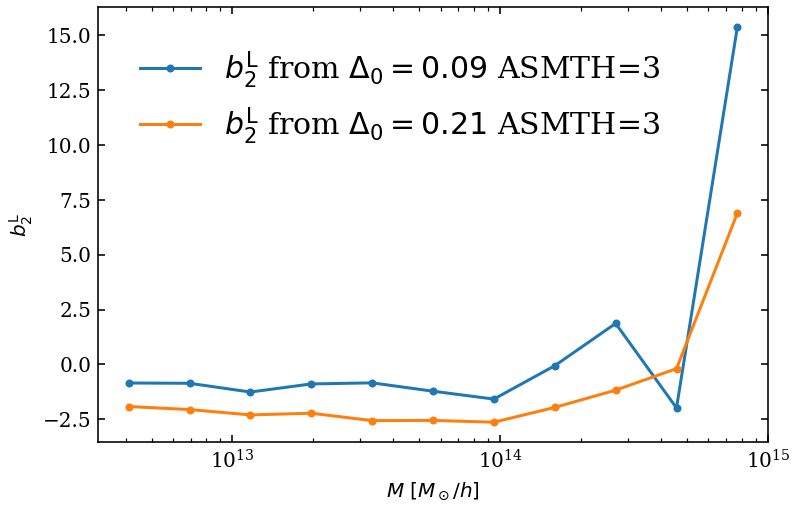

In [14]:
#plt.plot(massbin_1000, bias['bL2_ppp0004_1000_ASMTH3'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.012$ ASMRTH=3" )
plt.plot(massbin_1000, bias['bL2_ppp003_1000_ASMTH3'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.09$ ASMTH=3" )
plt.plot(massbin_1000, bias['bL2_ppp007_1000_ASMTH3'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.21$ ASMTH=3" )
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_ETT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_ETT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL1_ppp007_1000_ETT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )
#plt.plot(massbin_1000, bias['bL1_ppp007_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )


plt.xlabel(r"$M\ [M_\odot/h]$")
plt.ylabel(r"$b_{2}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
plt.savefig('/home/yinli/csit/analysis/bias/bL2_ASMTH3_comp.pdf')

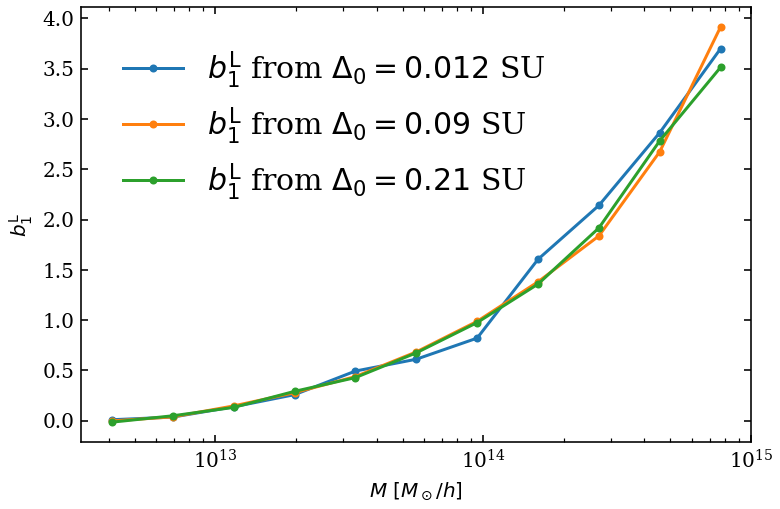

In [9]:
plt.plot(massbin_1000, bias['bL1_ppp0004_1000_SUnew'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.012$ SU" )
plt.plot(massbin_1000, bias['bL1_ppp003_1000_SUnew'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.09$ SU" )
plt.plot(massbin_1000, bias['bL1_ppp007_1000_SUnew'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ SU" )
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_ETT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_ETT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL1_ppp007_1000_ETT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )
#plt.plot(massbin_1000, bias['bL1_ppp007_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )


plt.xlabel(r"$M\ [M_\odot/h]$")
plt.ylabel(r"$b_{1}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
plt.savefig('/home/yinli/csit/analysis/bias/bL1_SUnew_comp.pdf')

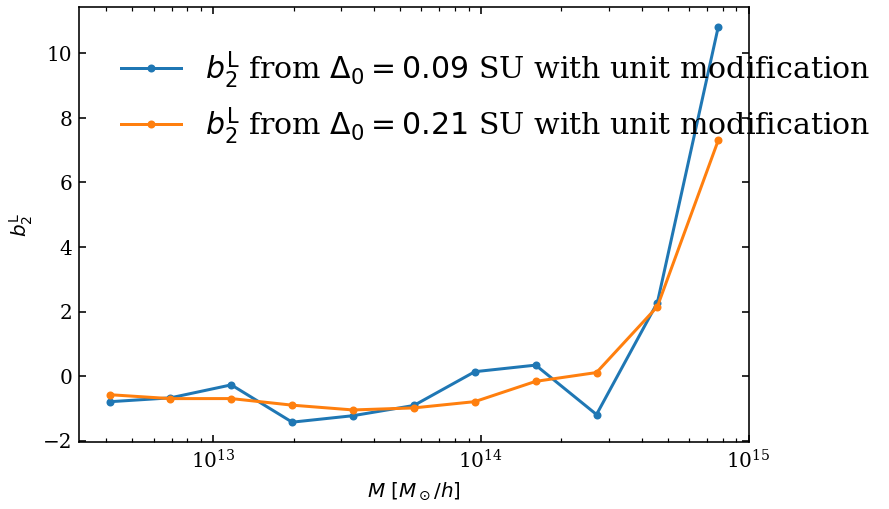

In [36]:
#plt.plot(massbin_1000, bias['bL2_ppp0004_1000_SUnew'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.012$ SU" )
plt.plot(massbin_1000, bias['bL2_ppp003_1000_SU_test'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.09$ SU with unit modification" )
plt.plot(massbin_1000, bias['bL2_ppp007_1000_SU_test'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.21$ SU with unit modification" )
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_ETT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_ETT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL1_ppp007_1000_ETT'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrTolTheta=0.5" )
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )
#plt.plot(massbin_1000, bias['bL1_ppp003_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )
#plt.plot(massbin_1000, bias['bL1_ppp007_1000_ETFA'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ ErrrTolForceAcc=0.002" )


plt.xlabel(r"$M\ [M_\odot/h]$")
plt.ylabel(r"$b_{2}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
plt.savefig('/home/yinli/csit/analysis/bias/bL2_SUnew_comp.pdf')

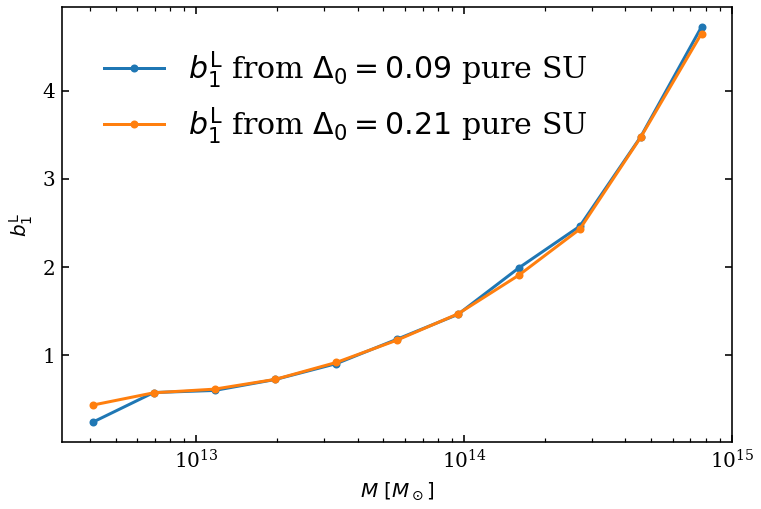

In [19]:
#plt.plot(massbin_1000, bias['bL1_ppp0004_1000_SU'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.012$ pure SU" )
plt.plot(massbin_1000, bias['bL1_ppp003_1000_SU'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.09$ pure SU" )
plt.plot(massbin_1000, bias['bL1_ppp007_1000_SU'], marker='.',label=r"$b^{\rm L}_{1}$ from $\Delta_0 = 0.21$ pure SU" )

plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{1}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
plt.savefig('/home/yinli/csit/analysis/bias/bL1_SU_comp.pdf')

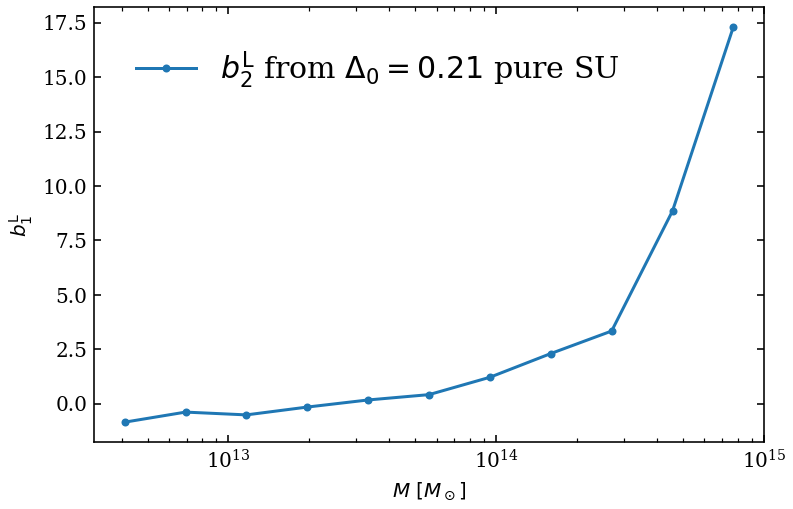

In [22]:
#plt.plot(massbin_1000, bias['bL2_ppp0004_1000_SU'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.012$ pure SU" )
#plt.plot(massbin_1000, bias['bL2_ppp003_1000_SU'], marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.09$ pure SU" )
plt.plot(massbin_1000, bias['bL2_ppp007_1000_SU']+8*bias['bL1_ppp007_1000_SU']/21, marker='.',label=r"$b^{\rm L}_{2}$ from $\Delta_0 = 0.21$ pure SU" )

plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{1}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
#plt.savefig('/home/yinli/csit/analysis/bias/bL2_SU_comp.pdf')

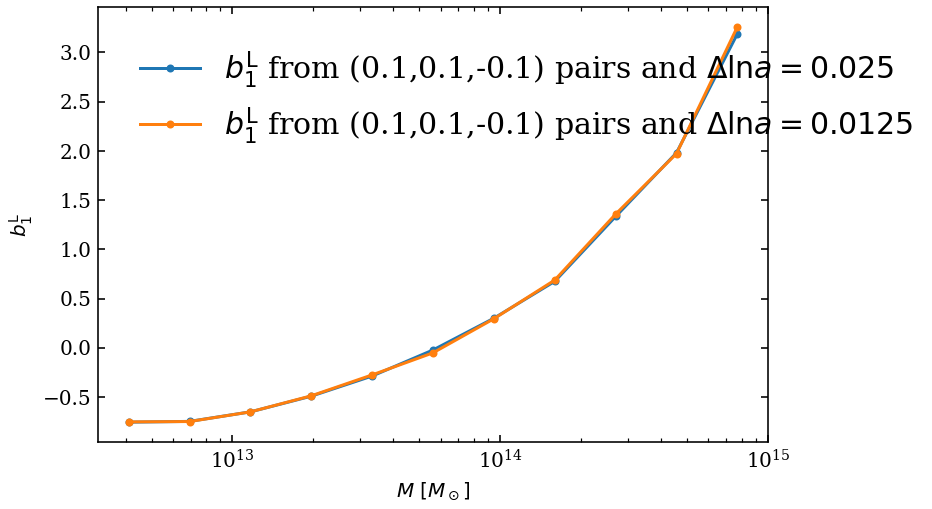

In [21]:
plt.plot(massbin_1000, bias['bL1_p01p01m01_1000'], marker='.',label=r"$b^{\rm L}_{1}$ from (0.1,0.1,-0.1) pairs and $\Delta\ln{a}=0.025$" )
plt.plot(massbin_1000, bias['bL1_p01p01m01_1000_MST00125'], marker='.',label=r"$b^{\rm L}_{1}$ from (0.1,0.1,-0.1) pairs and $\Delta\ln{a}=0.0125$" )
#plt.plot(massbin, bL1_test1, marker='.',label=r"$b^{\rm L}_{1}$ from (0.1,0.1,-0.1) pairs" )
#plt.plot(massbin_250, bL1_250_ppp, marker='.',label=r"$b^{\rm L}_{1}$ from highres (0.03,0.03,0.03) pairs" )


plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{1}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
plt.savefig('/home/yinli/csit/analysis/bias/bL1_p01p01m01_MST_comp.pdf')

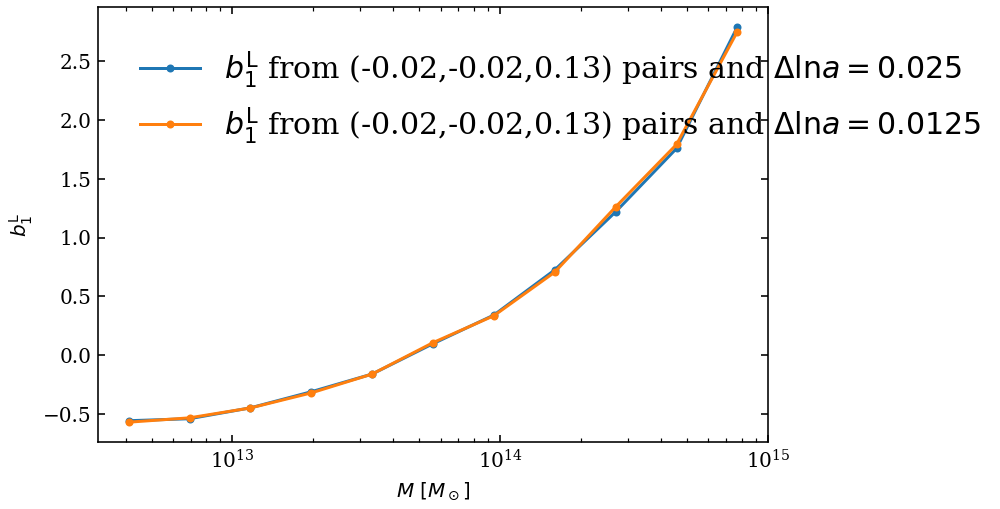

In [22]:
plt.plot(massbin_1000, bias['bL1_m002m002p013_1000'], marker='.',label=r"$b^{\rm L}_{1}$ from (-0.02,-0.02,0.13) pairs and $\Delta\ln{a}=0.025$" )
plt.plot(massbin_1000, bias['bL1_m002m002p013_1000_MST00125'], marker='.',label=r"$b^{\rm L}_{1}$ from (-0.02,-0.02,0.13) pairs and $\Delta\ln{a}=0.0125$" )
#plt.plot(massbin, bL1_test1, marker='.',label=r"$b^{\rm L}_{1}$ from (0.1,0.1,-0.1) pairs" )
#plt.plot(massbin_250, bL1_250_ppp, marker='.',label=r"$b^{\rm L}_{1}$ from highres (0.03,0.03,0.03) pairs" )


plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{1}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
plt.savefig('/home/yinli/csit/analysis/bias/bL1_m002m002p013_MST_comp.pdf')

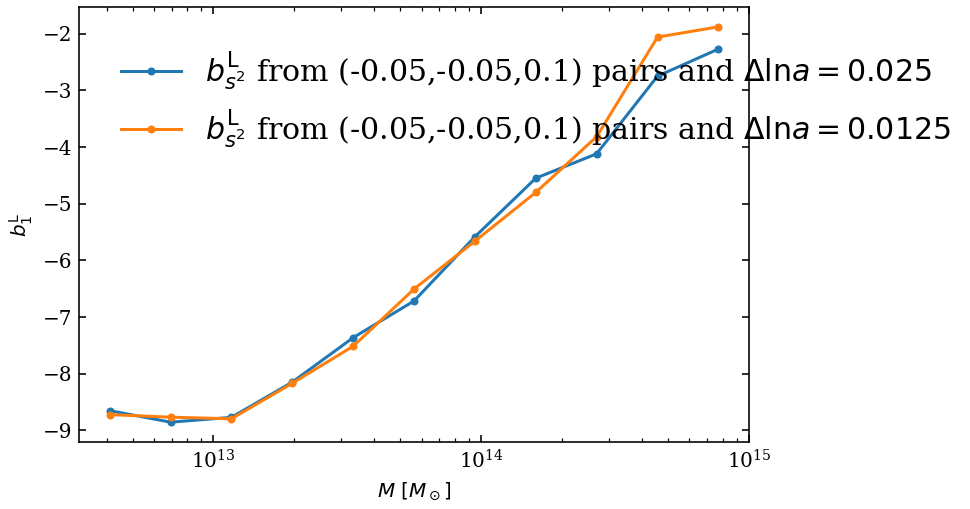

In [23]:
plt.plot(massbin_1000, bias['bLs2_mmp01_1000'], marker='.',label=r"$b^{\rm L}_{s^2}$ from (-0.05,-0.05,0.1) pairs and $\Delta\ln{a}=0.025$" )
plt.plot(massbin_1000, bias['bLs2_mmp01_1000_MST00125'], marker='.',label=r"$b^{\rm L}_{s^2}$ from (-0.05,-0.05,0.1) pairs and $\Delta\ln{a}=0.0125$" )
#plt.plot(massbin, bL1_test1, marker='.',label=r"$b^{\rm L}_{1}$ from (0.1,0.1,-0.1) pairs" )
#plt.plot(massbin_250, bL1_250_ppp, marker='.',label=r"$b^{\rm L}_{1}$ from highres (0.03,0.03,0.03) pairs" )


plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{1}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
plt.savefig('/home/yinli/csit/analysis/bias/bLs2_mmp01_MST_comp.pdf')

In [25]:
bL1_1000_p01p01m01 = np.loadtxt('bL1_p01p01m01_1000.txt')
bL1_1000_m002m002p013 = np.loadtxt('bL1_m002m002p013_1000.txt')

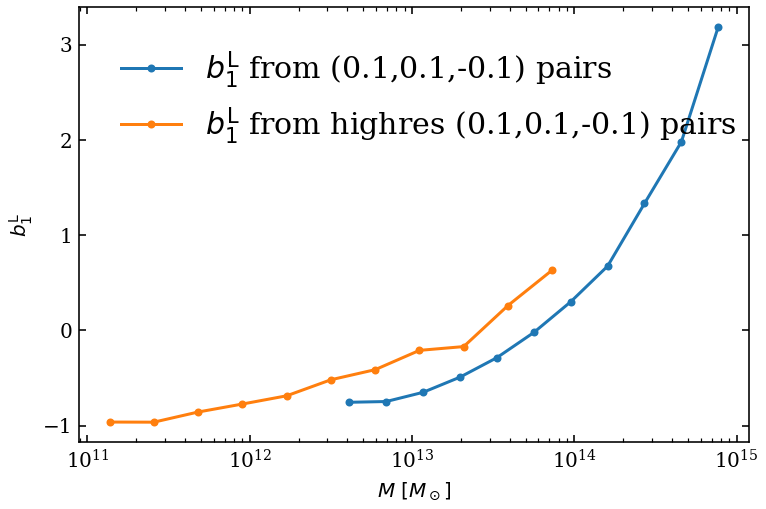

In [31]:
plt.plot(massbin, bL1_1000_p01p01m01, marker='.',label=r"$b^{\rm L}_{1}$ from (0.1,0.1,-0.1) pairs" )
plt.plot(massbin_250, bL1_250_p01p01m01, marker='.',label=r"$b^{\rm L}_{1}$ from highres (0.1,0.1,-0.1) pairs" )
#plt.plot(massbin_250, bL1_250_m002m002p013, marker='.',label=r"$b^{\rm L}_{1}$ from (-0.02,-0.02,0.13) pairs" )

plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{1}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
#plt.savefig('/home/yinli/csit/analysis/halos/planck2015/1000/bL1_p01p01m01_comp.pdf')

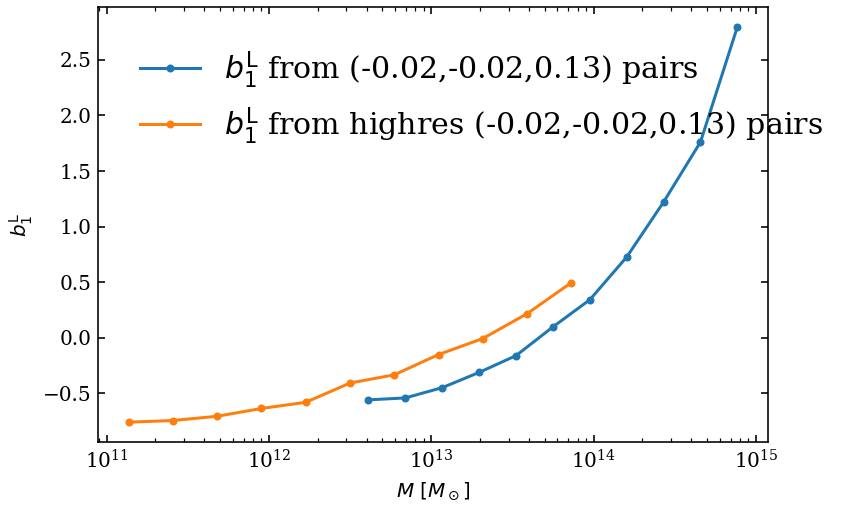

In [28]:
plt.plot(massbin, bL1_1000_m002m002p013, marker='.',label=r"$b^{\rm L}_{1}$ from (-0.02,-0.02,0.13) pairs" )
plt.plot(massbin_250, bL1_250_m002m002p013, marker='.',label=r"$b^{\rm L}_{1}$ from highres (-0.02,-0.02,0.13) pairs" )
#plt.plot(massbin_250, bL1_250_m002m002p013, marker='.',label=r"$b^{\rm L}_{1}$ from (-0.02,-0.02,0.13) pairs" )

plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{1}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
#plt.savefig('/home/yinli/csit/analysis/halos/planck2015/1000/bL1_m002m002p013_comp.pdf')

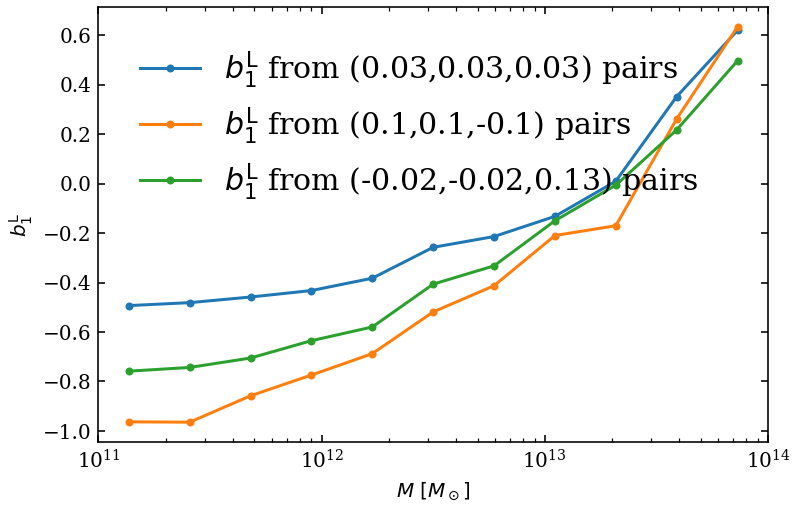

In [25]:
plt.plot(massbin_250, bL1_250_ppp, marker='.',label=r"$b^{\rm L}_{1}$ from (0.03,0.03,0.03) pairs" )
plt.plot(massbin_250, bL1_250_p01p01m01, marker='.',label=r"$b^{\rm L}_{1}$ from (0.1,0.1,-0.1) pairs" )
plt.plot(massbin_250, bL1_250_m002m002p013, marker='.',label=r"$b^{\rm L}_{1}$ from (-0.02,-0.02,0.13) pairs" )

plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{1}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
#plt.savefig('/home/yinli/csit/analysis/halos/planck2015/1000/bL1_250_comp.pdf')

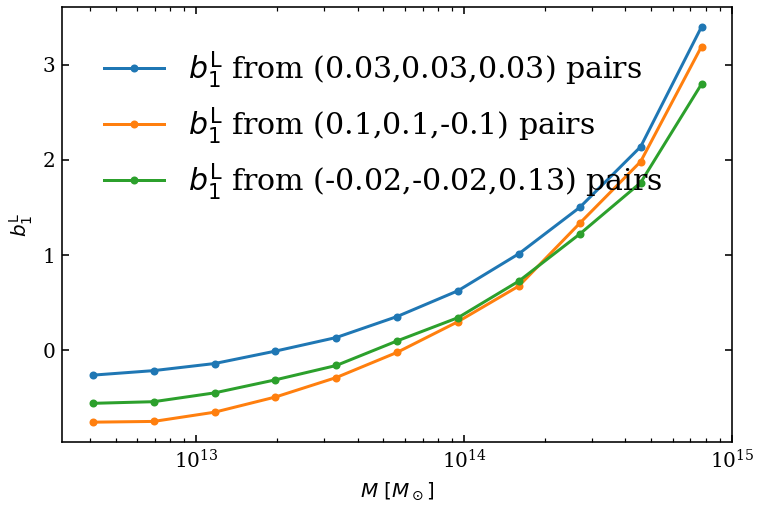

In [33]:
plt.plot(massbin, bL1, marker='.',label=r"$b^{\rm L}_{1}$ from (0.03,0.03,0.03) pairs" )
plt.plot(massbin, bL1_1000_p01p01m01, marker='.',label=r"$b^{\rm L}_{1}$ from (0.1,0.1,-0.1) pairs" )
plt.plot(massbin, bL1_1000_m002m002p013, marker='.',label=r"$b^{\rm L}_{1}$ from (-0.02,-0.02,0.13) pairs" )

plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{1}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
plt.savefig('/home/yinli/csit/analysis/halos/planck2015/1000/bL1_1000_comp.pdf')

In [ ]:
plt.plot(massbin, bL1, marker='.',label=r"$b^{\rm L}_{1}$ from (0.03,0.03,0.03) pairs" )
plt.plot(massbin, bL1_test1, marker='.',label=r"$b^{\rm L}_{1}$ from (-0.02,-0.02,-0.13) pairs" )


plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{1}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
#plt.savefig('/home/yinli/csit/analysis/halos/planck2015/1000/bL1_001sim.pdf')

In [22]:
plt.plot(massbin, bL1_test, marker='.',label=r"$b^{\rm L}_{1}$ from (0.1,0.1,-0.1) sims" )
plt.plot(massbin, bL1_test2, marker='.',label=r"$b^{\rm L}_{1}$ from 0.1 $\pm$ (-0.05,-0.05,0.1) sims")
plt.plot(massbin, bL1, marker='.',label=r"$b^{\rm L}_{1}$ from (0.03,0.03,0.03) sims")


plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{1}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)

#plt.savefig('/home/yinli/csit/analysis/halos/planck2015/1000/bL1_testcomp.pdf')

NameError: name 'bL1_test' is not defined

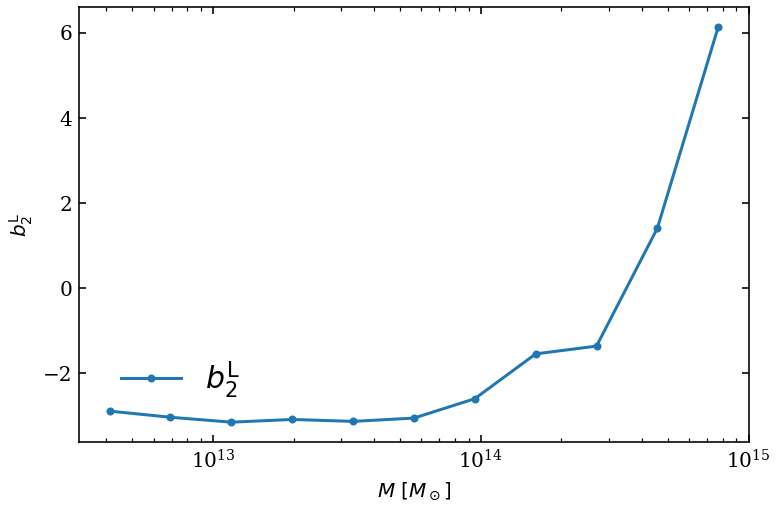

In [25]:
#plt.plot(massbin, bL2, marker='.',label=r"$b^{\rm L}_{2}$" )
plt.plot(massbin, bL2, marker='.',label=r"$b^{\rm L}_{2}$" )

plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{2}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 0), loc='lower left', borderaxespad=1, fontsize=15)
#plt.savefig('/home/yinli/csit/analysis/halos/planck2015/1000/bL2_001sim.pdf')

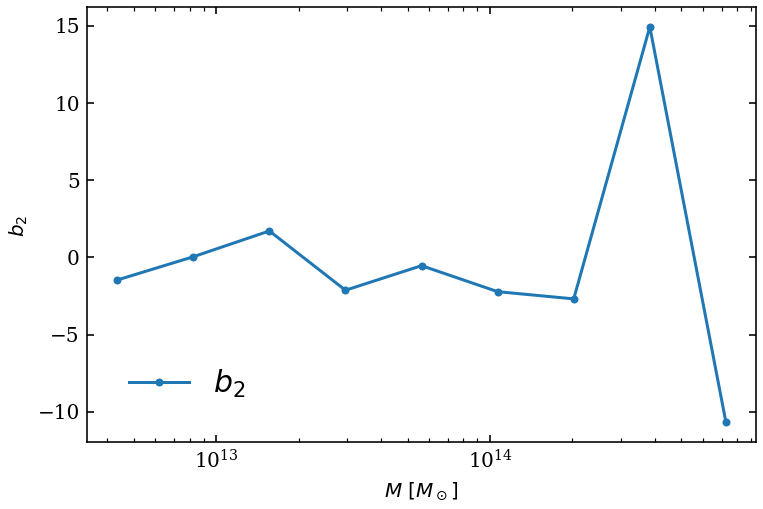

In [134]:
#plt.plot(massbin, bL2, marker='.',label=r"$b^{\rm L}_{2}$" )
plt.plot(massbin, bL2 + 8*bL1/21 , marker='.',label=r"$b_{2}$" )

plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{2}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 0), loc='lower left', borderaxespad=1, fontsize=15)
plt.savefig('/home/yinli/csit/analysis/halos/planck2015/1000/b2_from_L_001sim.pdf')

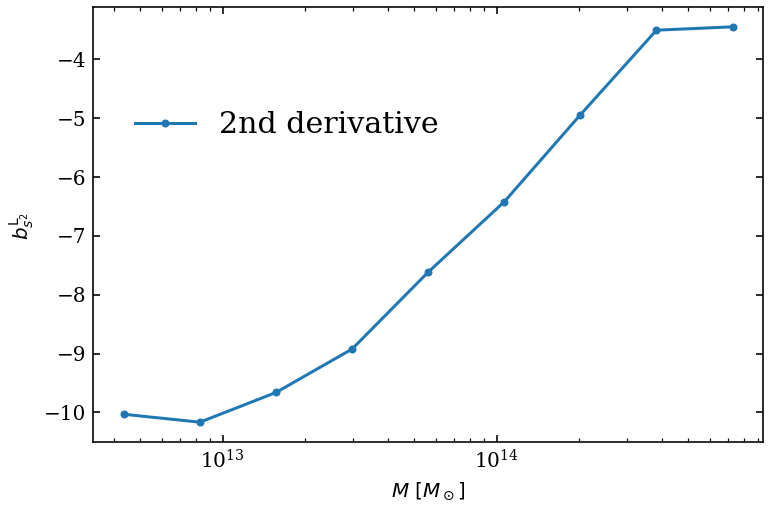

In [73]:
#plt.plot(massbin, bLs2, marker='.',label=r"$b^{\rm L}_{s^2}$" )
#plt.plot(massbin, bLs2_p, marker='.',label="1st derivative, mmp-iso" )
#plt.plot(massbin, bLs2_m, marker='.',label="1st derivative, ppm-iso" )
#plt.plot(massbin, bLs2_p, marker='.',label="1st derivative mmp-iso" )
#plt.plot(massbin, bLs2_m, marker='.',label="1st derivative ppm-iso" )
plt.plot(massbin, bLs2, marker='.',label="2nd derivative" )

plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{s^2}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 0.6), loc='lower left', borderaxespad=1, fontsize=15)
#plt.savefig('/home/yinli/csit/analysis/halos/planck2015/1000/bLs2_1st_2nd.pdf')

In [28]:
bLs_250 = np.loadtxt('bLs2_250.txt')

In [29]:
nbin_new = 10
bins_new = np.logspace(11, 13, nbin_new)

In [30]:
massbin_new = []
for i in range(1, len(bins_new)):
    massbin_new.append( np.sqrt(bins_new[i-1]*bins_new[i]) ) 

In [34]:
bLs_250

array([ -5.85686134,  -6.08071201,  -6.6012284 ,  -7.11402017,
        -7.73379013,  -9.1465953 ,  -9.85537672,  -7.3015873 ,
       -10.68447412])

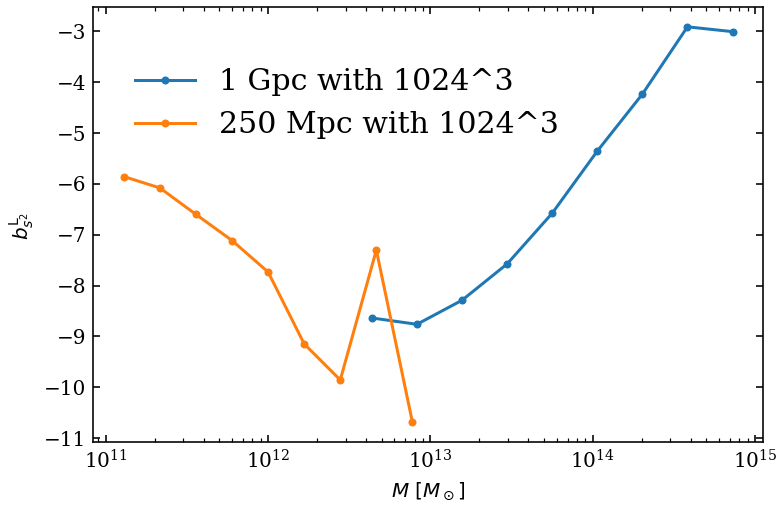

In [33]:
plt.plot(massbin, bLs2, marker='.',label="1 Gpc with 1024^3" )
plt.plot(massbin_new, bLs_250, marker='.',label="250 Mpc with 1024^3")

plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{s^2}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 0.6), loc='lower left', borderaxespad=1, fontsize=15)
plt.savefig('/home/yinli/csit/analysis/halos/planck2015/1000/bLs2_comp.pdf')

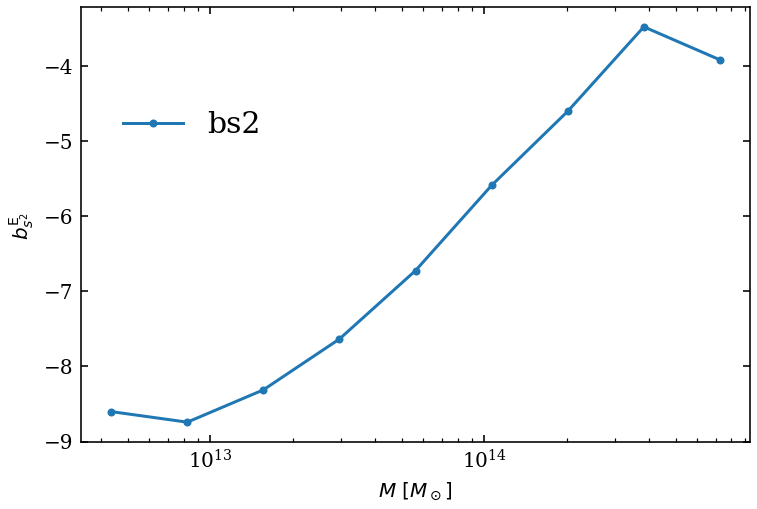

In [28]:
plt.plot(massbin, bLs2 - 2.*bL1/7., marker='.',label="bs2" )

plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{s^2}^{\rm E}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 0.6), loc='lower left', borderaxespad=1, fontsize=15)
#plt.savefig('/home/yinli/csit/analysis/halos/planck2015/1000/bLs2_1st_2nd.pdf')

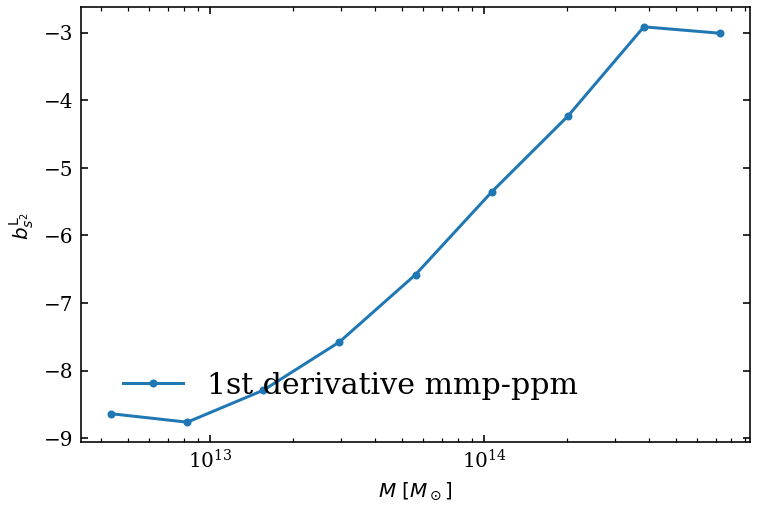

In [29]:
#plt.plot(massbin, bLs2, marker='.',label=r"$b^{\rm L}_{s^2}$" )
#plt.plot(massbin, bLs2_p, marker='.',label="1st derivative, mmp-iso" )
#plt.plot(massbin, bLs2_m, marker='.',label="1st derivative, ppm-iso" )
plt.plot(massbin, bLs2, marker='.',label="1st derivative mmp-ppm" )


plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{s^2}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 0), loc='lower left', borderaxespad=1, fontsize=15)
plt.savefig('/home/yinli/csit/analysis/halos/planck2015/1000/bLs2_2nd_new.pdf')

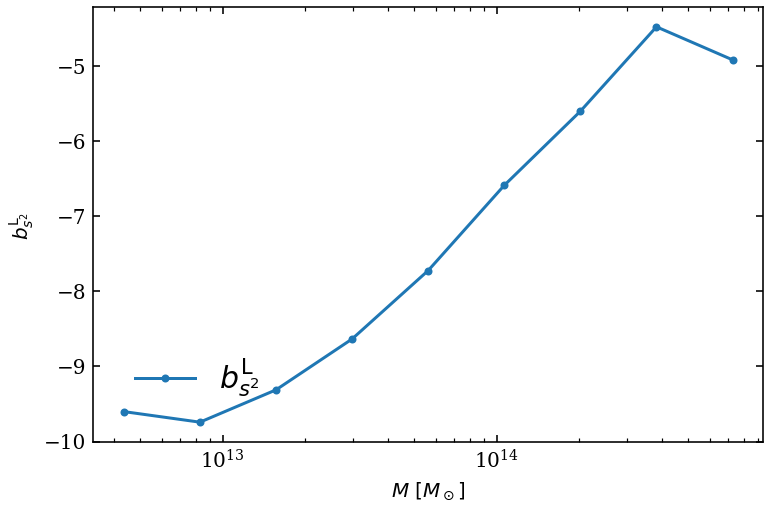

In [30]:
plt.plot(massbin, bLs2 - 2*bL1/7- 1, marker='.',label=r"$b^{\rm L}_{s^2}$" )
#plt.plot(massbin, bLs2_p, marker='.',label=r"$b^{\rm L}_{s^2}$" )
#plt.plot(massbin, bLs2_m, marker='.',label=r"$b^{\rm L}_{s^2}$" )


plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{s^2}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 0), loc='lower left', borderaxespad=1, fontsize=15)
#plt.savefig('/home/yinli/csit/analysis/halos/planck2015/1000/bLs2_diff.pdf')

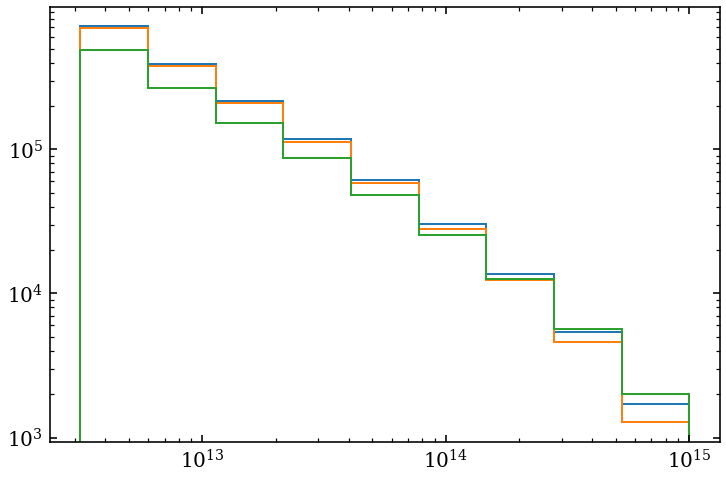

In [135]:
n_array_tides = {}  #Number density

for seed in seedlist_tides:
    n_array_tides[seed+'_'+kindlist_tides[0]] = plt.hist(mass_array_tides[seed+'_'+kindlist_tides[0]][:-1], bins,
                                    weights=np.full(mass_array_tides[seed+'_'+kindlist_tides[0]][:-1].shape, 1),
                                    histtype='step')
    n_array_tides[seed+'_'+kindlist_tides[1]] = plt.hist(mass_array_tides[seed+'_'+kindlist_tides[1]][:-1], bins,
                                    weights=np.full(mass_array_tides[seed+'_'+kindlist_tides[1]][:-1].shape, 1./ a_ratio_mmp(0).prod()),
                                    histtype='step')
    n_array_tides[seed+'_'+kindlist_tides[2]] = plt.hist(mass_array_tides[seed+'_'+kindlist_tides[2]][:-1], bins,
                                    weights=np.full(mass_array_tides[seed+'_'+kindlist_tides[2]][:-1].shape, 1./ a_ratio_ppm(0).prod()),
                                    histtype='step')
plt.xscale('log')
plt.yscale('log')

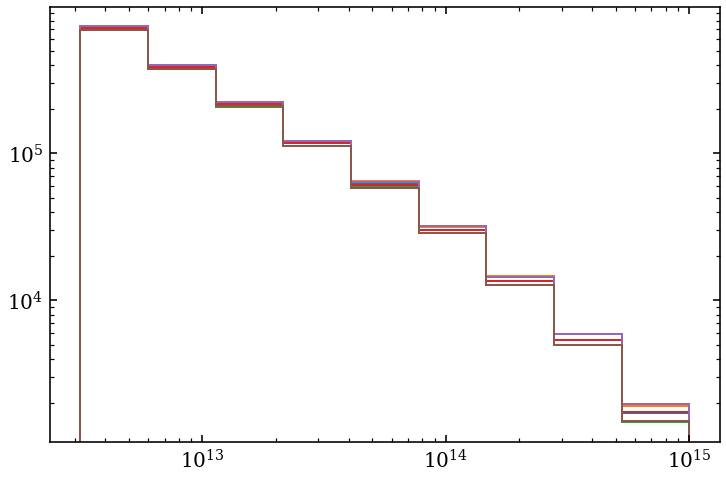

In [136]:
n_array_iso = {}  #Number density
for seed in seedlist_iso:
    n_array_iso[seed+'_'+kindlist_iso[0]] = plt.hist(mass_array_iso[seed+'_'+kindlist_iso[0]][:-1], bins,
                                    weights=np.full(mass_array_iso[seed+'_'+kindlist_iso[0]][:-1].shape, 1),
                                    histtype='step')
    n_array_iso[seed+'_'+kindlist_iso[1]] = plt.hist(mass_array_iso[seed+'_'+kindlist_iso[1]][:-1], bins,
                                    weights=np.full(mass_array_iso[seed+'_'+kindlist_iso[1]][:-1].shape, 1./ a_ratio_ppp(0).prod()),
                                    histtype='step')
    n_array_iso[seed+'_'+kindlist_iso[2]] = plt.hist(mass_array_iso[seed+'_'+kindlist_iso[2]][:-1], bins,
                                    weights=np.full(mass_array_iso[seed+'_'+kindlist_iso[2]][:-1].shape, 1./ a_ratio_mmm(0).prod()),
                                    histtype='step')
plt.xscale('log')
plt.yscale('log')

In [137]:
n_halo_iso = np.zeros(nbin-1)
n_halo_mmp = np.zeros(nbin-1)
n_halo_ppm = np.zeros(nbin-1)

for seed in seedlist_tides:
    n_halo_iso += n_array_tides[seed+'_'+kindlist_tides[0]][0]
    n_halo_mmp += n_array_tides[seed+'_'+kindlist_tides[1]][0]
    n_halo_ppm += n_array_tides[seed+'_'+kindlist_tides[2]][0]

In [138]:
n_halo_iso_0 = np.zeros(nbin-1)
n_halo_ppp = np.zeros(nbin-1)
n_halo_mmm = np.zeros(nbin-1)

for seed in seedlist_iso:
    n_halo_iso_0 += n_array_iso[seed+'_'+kindlist_iso[0]][0]
    n_halo_ppp += n_array_iso[seed+'_'+kindlist_iso[1]][0]
    n_halo_mmm += n_array_iso[seed+'_'+kindlist_iso[2]][0]

In [139]:
b1 = (n_halo_ppp - n_halo_mmm)/(2*n_halo_iso_0*deltabE)

b2 = (n_halo_ppp + n_halo_mmm - 2*n_halo_iso_0 )/(n_halo_iso_0*deltabE*deltabE)

bs2 = (n_halo_mmp - n_halo_ppm)/(2*n_halo_iso*lambdaz*lambdaz*3./2.)

#bs2 =  (n_halo_mmp + n_halo_ppm - 2* (n_halo_iso + b1*deltazero ) )/(n_halo_iso*lambdaz*lambdaz*3/2) 

In [140]:
deltah_mmp = (n_halo_mmp - n_halo_iso)/n_halo_iso
deltah_ppm = (n_halo_ppm - n_halo_iso)/n_halo_iso

In [141]:
deltah_mmp

array([-0.01886235, -0.02532864, -0.03175977, -0.04032864, -0.05506126,
       -0.06862005, -0.09896536, -0.15327894, -0.25116302])

In [142]:
bs2_mmp = ( deltah_mmp - (1+bL1)*deltazero )/(3.*lambdaz*lambdaz/2)
bs2_ppm = ( deltah_ppm - (1+bL1)*deltazero )/(3.*lambdaz*lambdaz/2)
bs2_pm = (deltah_ppm + deltah_mmp - 0.)/(3.*lambdaz*lambdaz/2*2)

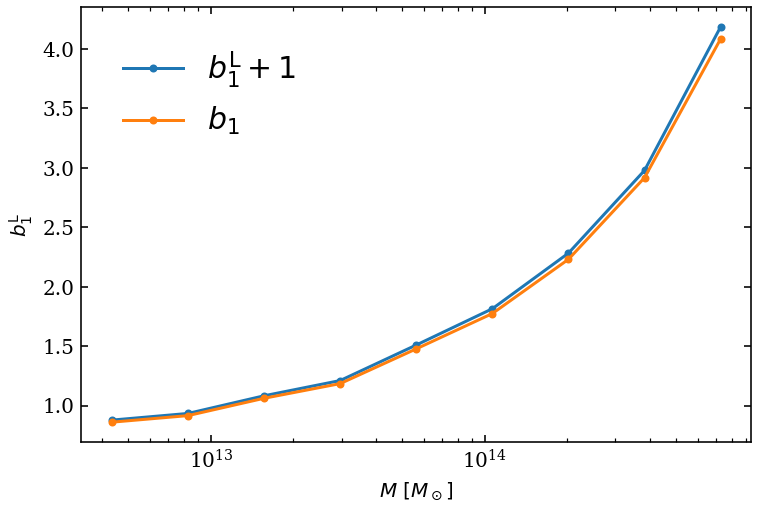

In [143]:
plt.plot(massbin, bL1 + 1, marker='.',label=r"$b^{\rm L}_{1}+1$" )
plt.plot(massbin, b1, marker='.',label=r"$b_{1}$" )

plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{1}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
plt.savefig('/home/yinli/csit/analysis/halos/planck2015/1000/b1_001sim.pdf')

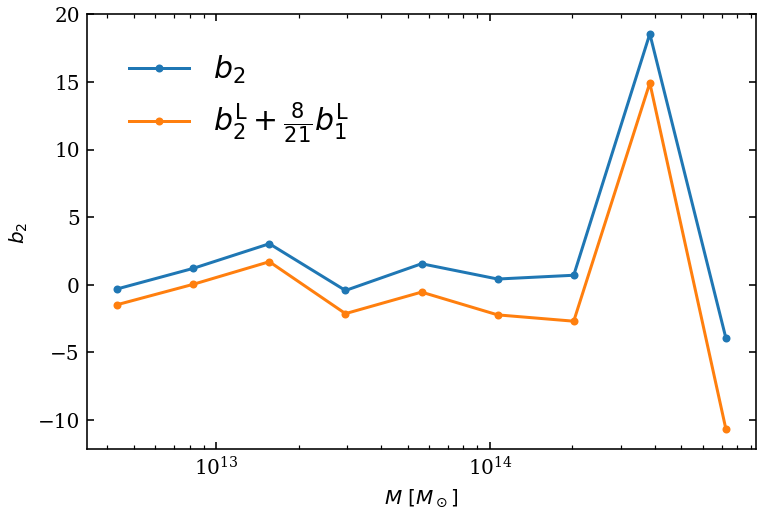

In [144]:
plt.plot(massbin, b2, marker='.',label=r"$b_{2}$" )
plt.plot(massbin, bL2+8.*bL1/21, marker='.',label=r"$b^{\rm L}_{2}+ \frac{8}{21}b^{\rm L}_1$" )


plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{2}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 0.6), loc='lower left', borderaxespad=1, fontsize=15)
plt.savefig('/home/yinli/csit/analysis/halos/planck2015/1000/b2_001sim.pdf')

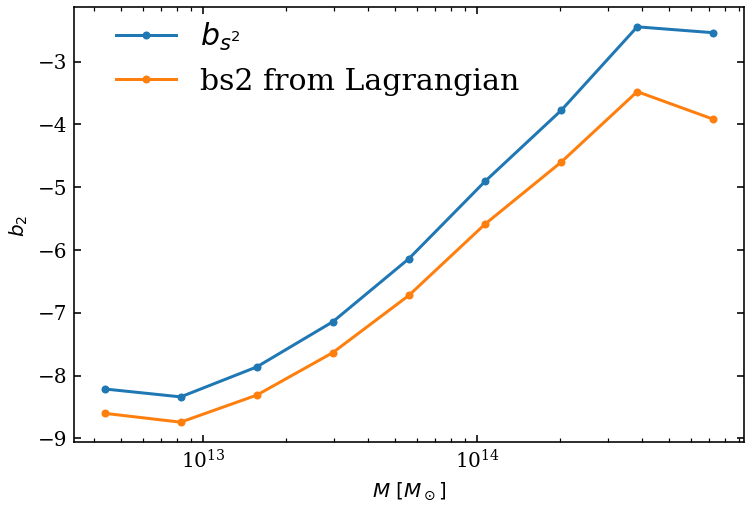

In [55]:
#plt.plot(massbin, bs2_mmp , marker='.',label=r"$b_{s^2}$" )
#plt.plot(massbin, bs2_ppm , marker='.',label=r"$b_{s^2}$" )
plt.plot(massbin, bs2_pm , marker='.',label=r"$b_{s^2}$" )
plt.plot(massbin, bLs2 - 2.*bL1/7., marker='.',label="bs2 from Lagrangian" )

plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{2}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 0.7), loc='lower left', borderaxespad=1, fontsize=15)
plt.savefig('/home/yinli/csit/analysis/halos/planck2015/1000/bs2.pdf')

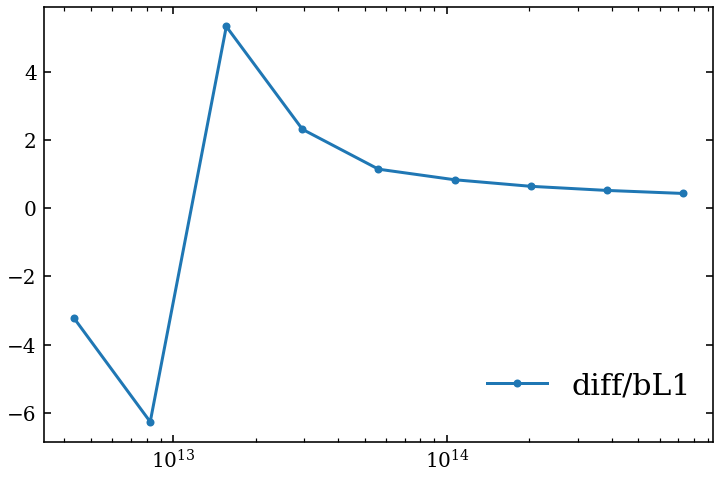

In [66]:
plt.plot(massbin, (bs2_pm  - (bLs2 - 2.*bL1/7.) )/bL1, marker='.',label=r"diff/bL1" )
#plt.plot(massbin, bL1/4, marker='.',label=r"bL1" )
plt.legend(bbox_to_anchor=(0.6, 0.), loc='lower left', borderaxespad=1, fontsize=15)

plt.xscale('log')

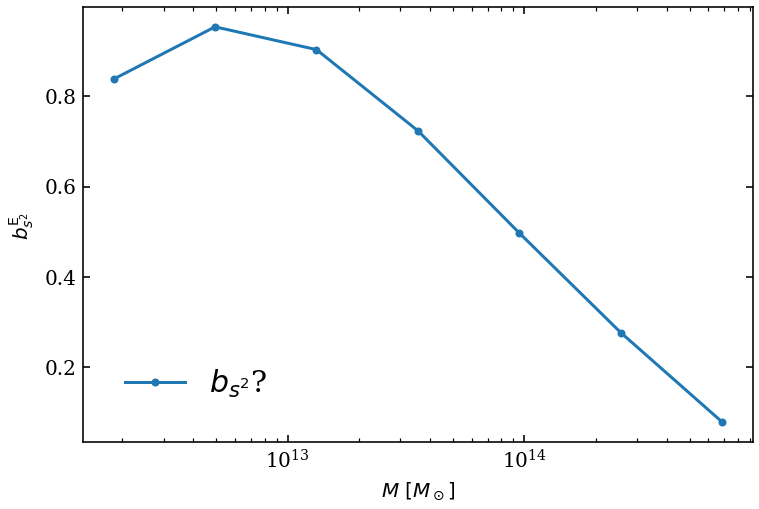

In [56]:
plt.plot(massbin, bs2, marker='.',label=r"$b_{s^2}$?" )
#plt.plot(massbin, bLs2, marker='.',label=r"$b^{\rm L}_{s^2}$?")
plt.xscale('log')
plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{s^2}^{\rm E}$ ")
plt.legend(bbox_to_anchor=(0, 0), loc='lower left', borderaxespad=1, fontsize=15)
#plt.savefig('/home/yinli/csit/analysis/halos/planck2015/1000/bs2.pdf')

In [ ]:
plt.plot(massbin, bs2-bLs2, marker='.',label=r"$b^{\rm E}_{s^2}-b^{\rm L}_{s^2}$" )
#plt.plot(massbin, bLs2, marker='.',label=r"$b^{\rm L}_{s^2}$")
plt.xscale('log')
#plt.legend(bbox_to_anchor=(0, 0), loc='lower left', borderaxespad=1, fontsize=15)

In [ ]:
plt.hist(halo_cat['Mass'], bins=np.logspace(13, 16, 16),
         weights=np.full(halo_cat['Mass'].shape, 1 / halo_cat.attrs['BoxSize'].prod()),
         histtype='step')
plt.xscale('log')
plt.yscale('log')